<a href="https://colab.research.google.com/github/rajeshsingh123/Dog-and-Cat-image-classifier-/blob/main/dogs_vs_cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets list

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           3218        137  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           3253        121  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data                                  10MB  2022-08-01 15:58:10           2082         75  0.9705882        
ericsims/world-cheese-awards-worlds-cheesiest-dataset  World Cheese Awards (World's Cheesiest Dataset)   49KB  2022-08-1

In [ ]:
! kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:05<00:00, 161MB/s]
100% 812M/812M [00:05<00:00, 164MB/s]


In [ ]:
! ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()

In [ ]:
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()

In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.6488.jpg', 'cat.984.jpg', 'dog.6268.jpg', 'dog.7054.jpg', 'dog.317.jpg', 'dog.5845.jpg', 'dog.2058.jpg', 'cat.3321.jpg', 'dog.6949.jpg', 'cat.9450.jpg', 'cat.7944.jpg', 'cat.11267.jpg', 'cat.2441.jpg', 'cat.733.jpg', 'dog.5973.jpg', 'dog.11345.jpg', 'dog.8152.jpg', 'dog.1152.jpg', 'dog.1176.jpg', 'cat.3989.jpg', 'dog.9501.jpg', 'cat.1455.jpg', 'cat.3796.jpg', 'cat.6878.jpg', 'cat.2422.jpg', 'dog.871.jpg', 'cat.5066.jpg', 'dog.12100.jpg', 'cat.1343.jpg', 'dog.8295.jpg', 'cat.3139.jpg', 'dog.1431.jpg', 'dog.9922.jpg', 'cat.9172.jpg', 'cat.7793.jpg', 'cat.5425.jpg', 'cat.10266.jpg', 'cat.10685.jpg', 'dog.8124.jpg', 'dog.780.jpg', 'cat.8791.jpg', 'dog.5877.jpg', 'cat.1525.jpg', 'dog.8351.jpg', 'dog.4838.jpg', 'dog.6482.jpg', 'cat.10032.jpg', 'cat.91.jpg', 'cat.110.jpg', 'cat.5533.jpg', 'cat.6761.jpg', 'cat.3674.jpg', 'dog.11544.jpg', 'cat.5231.jpg', 'dog.3730.jpg', 'cat.8388.jpg', 'cat.5502.jpg', 'dog.6547.jpg', 'cat.2865.jpg', 'dog.9852.jpg', 'dog.5605.jpg', 'cat.567.jpg', 'dog.5883

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

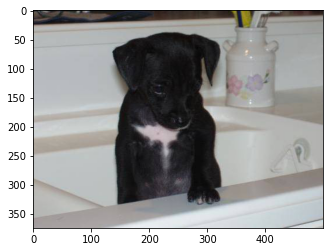

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

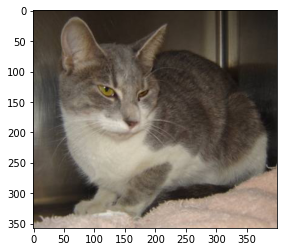

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
cat
dog
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

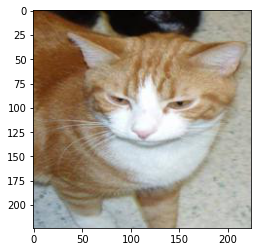

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.6488.jpg')
imgplt = plt.imshow(img)
plt.show()

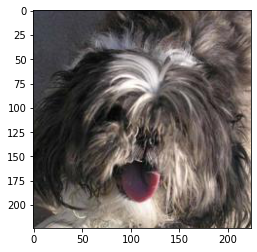

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.6268.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1



In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.6488.jpg', 'cat.984.jpg', 'dog.6268.jpg', 'dog.7054.jpg', 'dog.317.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 966 1034]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 20  60 119]
   [ 19  59 118]
   [ 19  57 115]
   ...
   [154 166 168]
   [150 162 164]
   [146 158 160]]

  [[ 19  59 118]
   [ 19  59 117]
   [ 20  58 116]
   ...
   [148 160 162]
   [143 155 157]
   [139 151 153]]

  [[ 14  54 112]
   [ 15  56 111]
   [ 17  56 111]
   ...
   [143 156 158]
   [139 152 154]
   [137 150 152]]

  ...

  [[169 159 141]
   [172 162 144]
   [175 165 147]
   ...
   [185 191 186]
   [181 187 182]
   [179 185 180]]

  [[175 165 147]
   [177 167 149]
   [180 170 152]
   ...
   [185 191 186]
   [182 188 183]
   [180 186 181]]

  [[174 164 146]
   [176 166 148]
   [179 169 151]
   ...
   [184 190 185]
   [182 188 183]
   [182 188 183]]]


 [[[128 127 131]
   [128 133 136]
   [129 142 144]
   ...
   [224 233 230]
   [228 236 226]
   [235 241 230]]

  [[134 134 140]
   [132 137 140]
   [127 142 145]
   ...
   [229 237 236]
   [230 236 231]
   [236 241 232]]

  [[142 144 152]
   [134 143 147]
   [126 145 150]
   ...
   [237 246 250]
   [236 242 241]
   [242 247

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.34117647 0.34901961 0.35294118]
   [0.32941176 0.3372549  0.34117647]
   [0.31764706 0.3254902  0.32941176]
   ...
   [0.22745098 0.29019608 0.31764706]
   [0.23921569 0.29411765 0.31764706]
   [0.18039216 0.23529412 0.25882353]]

  [[0.34117647 0.34901961 0.35294118]
   [0.32941176 0.3372549  0.34117647]
   [0.31764706 0.3254902  0.32941176]
   ...
   [0.21568627 0.27843137 0.30588235]
   [0.23137255 0.28627451 0.30980392]
   [0.17254902 0.22745098 0.25098039]]

  [[0.34117647 0.34901961 0.35294118]
   [0.32941176 0.3372549  0.34117647]
   [0.31764706 0.3254902  0.32941176]
   ...
   [0.20392157 0.26666667 0.29411765]
   [0.21568627 0.27058824 0.29411765]
   [0.16470588 0.21960784 0.24313725]]

  ...

  [[0.52156863 0.29019608 0.60784314]
   [0.50588235 0.2745098  0.59215686]
   [0.50980392 0.27843137 0.59607843]
   ...
   [0.49019608 0.31764706 0.34509804]
   [0.49019608 0.29803922 0.32941176]
   [0.45098039 0.25882353 0.29019608]]

  [[0.51764706 0.29019608 0.60784314]
   [0.5

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 39s 693ms/step - loss: 0.1547 - acc: 0.9531
Epoch 2/5
50/50 [==============================] - 36s 712ms/step - loss: 0.0637 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 36s 718ms/step - loss: 0.0447 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 35s 706ms/step - loss: 0.0335 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 35s 697ms/step - loss: 0.0259 - acc: 0.9950


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 10s 662ms/step - loss: 0.0573 - acc: 0.9800
Test Loss = 0.057263925671577454
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/dog_image1.jpg


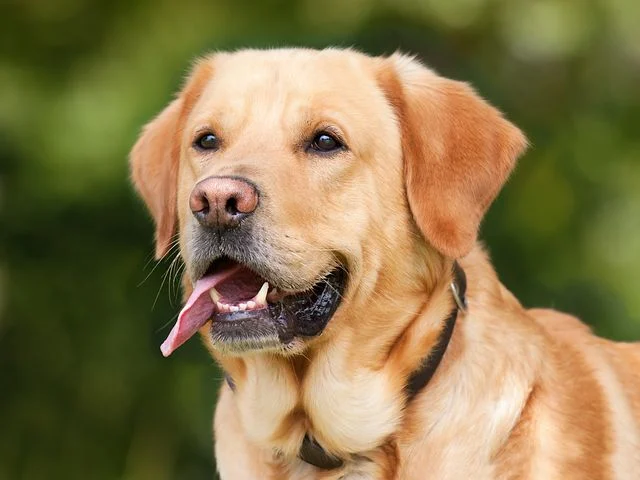

[[-5.68974    5.5420675]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')


input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat_image.jpg


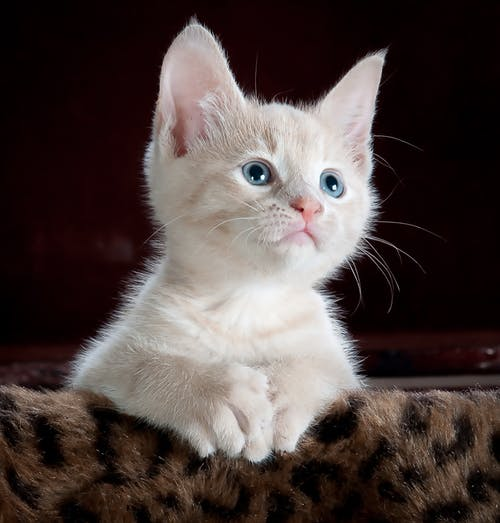

[[ 4.815333  -3.6418035]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')